In [94]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [95]:
data = pd.read_csv("data/Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [97]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [98]:
data.shape

(400, 9)

In [99]:
data.loc[data['Chance of Admit '] < 0.5, 'isAdmit'] = 0
data.loc[data['Chance of Admit '] >= 0.5, 'isAdmit'] = 1
data.isAdmit

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: isAdmit, Length: 400, dtype: float64

In [100]:
np.unique(data.isAdmit)

array([0., 1.])

In [101]:
target = data.iloc[:, -1]
new_data = data.iloc[:, :-2]

new_data.shape, target.shape

((400, 8), (400,))

In [102]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    new_data, target, test_size=0.5, random_state=1
)

In [103]:
data_X_train.shape, data_X_test.shape, data_y_train.shape, data_y_test.shape

((200, 8), (200, 8), (200,), (200,))

In [170]:
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(data_X_train, data_y_train)
target1_0 = cl1_1.predict(data_X_train)
target1_1 = cl1_1.predict(data_X_test)
accuracy_score(data_y_train, target1_0), accuracy_score(data_y_test, target1_1)

(0.94, 0.895)

In [141]:
cl1_2 = KNeighborsClassifier(n_neighbors=15)
cl1_2.fit(data_X_train, data_y_train)
target2_0 = cl1_2.predict(data_X_train)
target2_1 = cl1_2.predict(data_X_test)
accuracy_score(data_y_train, target2_0), accuracy_score(data_y_test, target2_1)

(0.94, 0.895)

In [140]:
cl1_3 = KNeighborsClassifier(n_neighbors=3)
cl1_3.fit(data_X_train, data_y_train)
target3_0 = cl1_3.predict(data_X_train)
target3_1 = cl1_3.predict(data_X_test)
accuracy_score(data_y_train, target3_0), accuracy_score(data_y_test, target3_1)

(0.97, 0.92)

In [166]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5)
scores1, np.mean(scores1)

(array([0.425 , 0.675 , 0.9125, 0.9125, 0.9125]), 0.7675000000000001)

In [165]:
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=5, scoring='jaccard')
scores2, np.mean(scores2)

(array([0.37837838, 0.675     , 0.9125    , 0.9125    , 0.9125    ]),
 0.7581756756756757)

In [163]:
scores3 = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=3, scoring='f1')
scores3, np.mean(scores3)

(array([0.33783784, 0.95686275, 0.95686275]), 0.7505211093446388)

In [162]:
scoring = {
    'accuracy': 'accuracy',
    'jaccard': 'jaccard',
    'f1': 'f1'
}

scores = cross_validate(KNeighborsClassifier(n_neighbors=15), 
                        new_data, target, scoring=scoring, 
                        cv=5, return_train_score=True)
scores

{'fit_time': array([0.00289416, 0.00292492, 0.00226998, 0.00312591, 0.00174785]),
 'score_time': array([0.00811505, 0.00849319, 0.005234  , 0.00500107, 0.00495386]),
 'test_accuracy': array([0.425 , 0.675 , 0.9125, 0.9125, 0.9125]),
 'train_accuracy': array([0.946875, 0.940625, 0.91875 , 0.93125 , 0.93125 ]),
 'test_jaccard': array([0.37837838, 0.675     , 0.9125    , 0.9125    , 0.9125    ]),
 'train_jaccard': array([0.94516129, 0.93910256, 0.91875   , 0.93015873, 0.93015873]),
 'test_f1': array([0.54901961, 0.80597015, 0.95424837, 0.95424837, 0.95424837]),
 'train_f1': array([0.97180763, 0.96859504, 0.95765472, 0.96381579, 0.96381579])}

In [154]:
%%time
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15), 
                         new_data, target, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

CPU times: user 1.23 s, sys: 4.55 ms, total: 1.23 s
Wall time: 1.24 s


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [158]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         new_data, target, 
                         cv=kf)
scores

array([0.85  , 0.9   , 1.    , 0.9875, 0.8625])

In [159]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [161]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data_X_train, data_y_train)

CPU times: user 230 ms, sys: 4.43 ms, total: 235 ms
Wall time: 236 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [167]:
clf_gs.cv_results_

{'mean_fit_time': array([0.0025651 , 0.00195312, 0.00159984, 0.00168233, 0.00173216,
        0.00150862, 0.00158291, 0.00157661, 0.00184855, 0.00176568]),
 'std_fit_time': array([3.89849749e-04, 2.34763403e-04, 9.52602499e-05, 2.38649514e-04,
        5.25408090e-04, 6.79335827e-05, 1.18855275e-04, 1.93795233e-04,
        3.91451147e-04, 2.64749051e-04]),
 'mean_score_time': array([0.00337729, 0.00279069, 0.00228434, 0.00211024, 0.00228558,
        0.00217552, 0.0022018 , 0.00217214, 0.00250168, 0.00227828]),
 'std_score_time': array([7.10878050e-04, 4.43648764e-04, 2.51956684e-04, 3.93608784e-05,
        1.89325466e-04, 1.25742185e-04, 9.77072964e-05, 7.77659276e-05,
        3.31134771e-04, 1.14819615e-04]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_

In [168]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [171]:
clf_gs.best_score_

0.9399999999999998

In [172]:
clf_gs.best_params_

{'n_neighbors': 10}

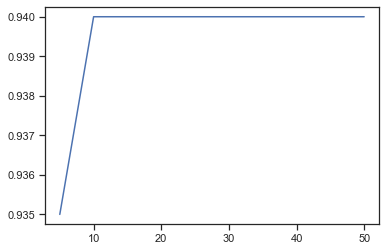

In [173]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [174]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

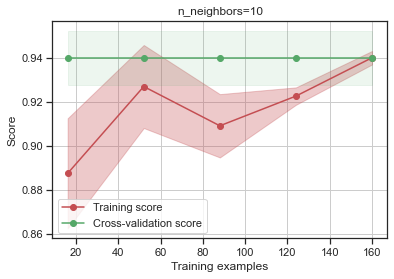

In [176]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    data_X_train, data_y_train, cv=5)

In [177]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

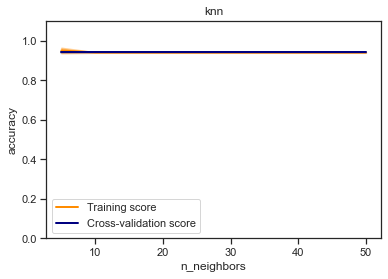

In [179]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_X_train, data_y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=3, scoring="accuracy")